In [1]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools
import tensorflow as tf
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

In [2]:
PATH = os.getcwd()
# Define data path
data_path = 'C:/Users/vedak/Downloads/archive (5)/data'
data_dir_list = os.listdir(data_path)
data_dir_list

['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [15]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=100
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-bike

Loaded the images of dataset-cars

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-flowers

Loaded the images of dataset-horses

Loaded the images of dataset-human

(1803, 128, 128, 3)


In [16]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [17]:
Y = np_utils.to_categorical(labels, num_classes)

In [27]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [28]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1442, 128, 128, 3)
X_test shape = (361, 128, 128, 3)


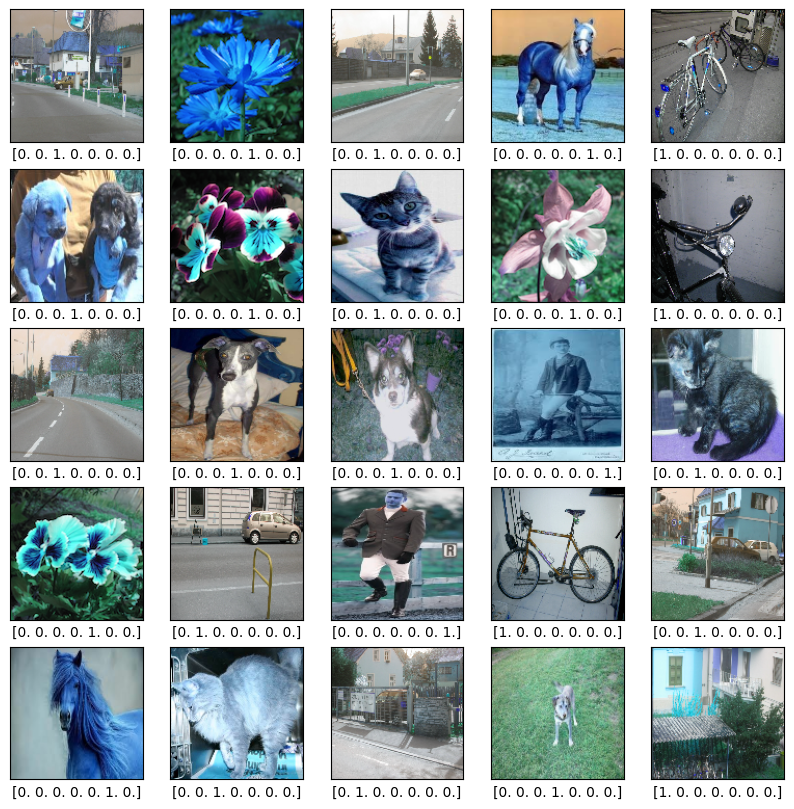

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i])
plt.show()

In [30]:
input_shape2=img_data[0].shape

from tensorflow.keras import datasets, layers, models
print(input_shape2)
# Design the CNN Sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, 3, 3,activation='relu', input_shape=input_shape2, padding = 'same'))
model.add(layers.MaxPooling2D(2,2, padding = 'same'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes,activation = 'softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(128, 128, 3)


In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 43, 1)         36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 22, 1)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 22, 1)         0         
                                                                 
 flatten_2 (Flatten)         (None, 704)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               180480    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                      

In [24]:
hist = model.fit(X_train, y_train, epoch=3, validation_data=(X_test, y_test))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\vedak\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\vedak\AppData\Local\Temp\ipykernel_3552\1493648749.py", line 1, in <module>
    hist = model.fit(X_train, y_train, epoch=3, validation_data=(X_test, y_test))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vedak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\vedak\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'epoc